## This program displays the anomalous December temperatures for the NE United States from 2008 through 2019
## It compares the anomalous temperatures from 2008 to 2019 with NAO data from the same period
## It uses spearmanr to calculate correlation coefficients and significance < .05


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
# import geopandas as gpd

In [2]:
path='/shared/obs/gridded/GHCN_CAMS/'
file='air.mon.mean.nc'

In [3]:
ds=xr.open_dataset(path+file)
ds
proj=ccrs.PlateCarree()


In [4]:
#  REVERSE OUR Latitudes
ds = ds.reindex(lat=list(reversed(ds['lat'])))

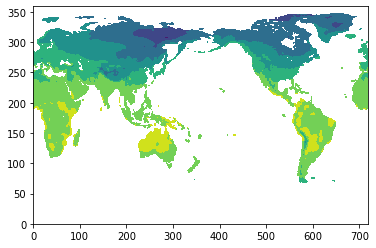

In [5]:
#  PLOT surface air temperature data for January, 1948
plt.contourf(ds['air'][0,:,:])

In [6]:
# Shift longitudes to run from -180 to +180
#ds=ds.assign_coords(lon=(((ds['lon']+180) % 360))-180)
#ds=ds.sortby(ds['lon'])


### Select region, U.S. Northeast, with times 1948 through 2019

ds_region=ds.sel(lon=slice(-120,-60),lat=slice(30,60),time=slice('1948-01-01', '2019-12-01'))
ds_region


In [7]:
# Slice time to match Nino34 data
#  for info, ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))

ds_region=ds.sel(lon=slice(240,300),lat=slice(30,60),time=slice('1948-01-01', '2019-12-01')) 
ds_region


<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 864)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html

In [8]:
# Find mean air temperature .
ds_regionm=ds_region.groupby('time.month').mean(dim='time')
ds_regionm




<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, month: 12)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [9]:
# Set up anomalous data:i.e. the difference between the current air temperature and the mean air temperature.
ds_anom = ds_region.groupby('time.month') - ds_regionm
ds_anom

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 864)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

## Plot average December temperature for time period 1948 to 2019

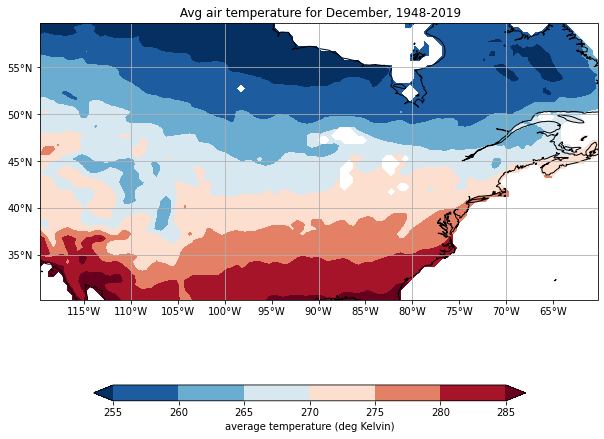

In [10]:
# set up subplot using plt. Just print one contour for average Dec. temps.

# alevels = np.arange (-10, 10, 1)
fig = plt.figure(figsize=(10,11))
#plt.contourf(ds_regionm['lon'],ds_regionm['lat'],ds_regionm['air'][11,:,:],cmap='RdBu_r')
#ax=plt.gca()
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
lon_formatter=cticker.LongitudeFormatter()
lat_formatter=cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xticks(np.arange(-120,-60, 5),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.set_yticks(np.arange(30,60,5),crs=ccrs.PlateCarree())

plt.title(' Avg air temperature for December, 1948-2019')
cs= ax.contourf(ds_regionm['lon'],ds_regionm['lat'], ds_regionm['air'][11,:,:],cmap='RdBu_r',
        transform=ccrs.PlateCarree(),extend='both')
cbar_ax=fig.add_axes([0.2,0.2,0.6,0.02])
cbar = plt.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='average temperature (deg Kelvin)',)

plt.show()

## Read in North Atlantic Anomaly (nao) data
##

In [11]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(4).index,inplace=True)
df.drop(df.head(2).index,inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49
1953,-0.12,-1.00,-0.45,-1.96,-0.56,1.41,0.43,-1.04,-0.19,1.95,0.96,-0.52
1954,-0.08,0.40,-1.27,1.31,-0.03,0.06,-0.57,-2.57,-0.28,1.16,0.29,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.57,1.05,1.12,0.64,0.19,0.24,-3.14,-1.10,-0.49,0.99,1.70,1.99
2016,-0.37,1.35,0.37,0.26,-0.67,-0.13,-1.72,-2.24,0.74,0.96,-0.31,0.35
2017,0.05,0.69,0.37,1.74,-1.72,0.35,1.28,-1.53,-0.45,0.71,-0.14,0.73


In [12]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1950-1-01


### Check input data

In [13]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=840, freq='MS')

In [14]:
clim_index=df.T.unstack().values
clim_index= clim_index.astype(float)
# clim_index

In [15]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    nao      (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -0.01 -1.03 0.16 1.02

### ds_index is our nao converted into an xarray Dataset
### Plot it out

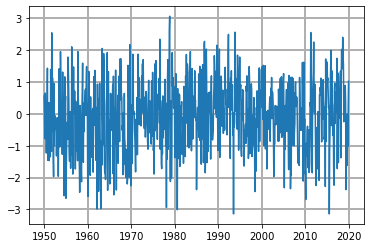

In [16]:
plt.plot(ds_index['time'],ds_index['nao'])
plt.grid(b=None, which='major', axis='both', linewidth='2')

### Match anomaly data time to nao time series

In [17]:
ds_anom=ds_anom.sel(time=slice(ds_index['time'][0],ds_index['time'][-1]))
ds_anom
df=ds_anom.to_dataframe
df



<bound method Dataset.to_dataframe of <xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 840)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan>

In [18]:
ds_index=ds_index.sel(time=slice(ds_index['time'][0],ds_index['time'][839]))
ds_index

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    nao      (time) float64 0.56 0.01 -0.78 0.65 -0.5 ... -0.01 -1.03 0.16 1.02

### Check out nao time series from 1950 to 2019

Text(0.5, 1.0, ' North Atlantic Oscillation (nao)')

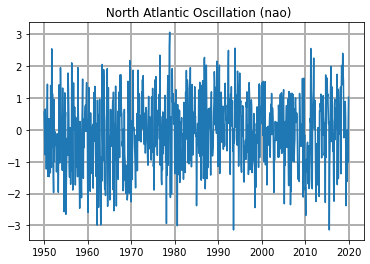

In [19]:
# Check shortened nao time sequence to December, 2019 from 2020 data.
plt.plot(ds_index['time'],ds_index['nao'])
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.title(' North Atlantic Oscillation (nao)')

### Look at shorter time series from 1970 to 2019

Text(0.5, 1.0, ' North Atlantic Oscillation (nao)')

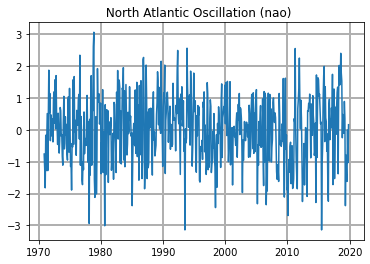

In [20]:
plt.plot(ds_index['time'][250:839],ds_index['nao'][250:839])
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.title(' North Atlantic Oscillation (nao)')

### pick a point located close to Washington DC 

In [21]:
pt=ds_anom.sel(lat=38.9,lon=360.0-77.0,method='nearest')
pt

<xarray.Dataset>
Dimensions:  (time: 840)
Coordinates:
    lat      float64 38.75
    lon      float32 283.25
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air      (time) float32 6.6812134 0.19711304 ... -1.7677917 1.4970398

### Plot anomalous data together with nao data

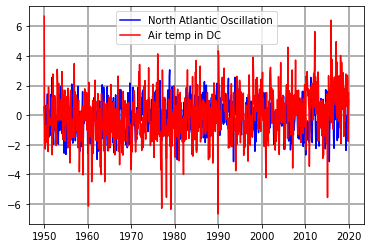

In [22]:
plt.plot(ds_index['time'],ds_index['nao'],'b')
plt.plot(pt['time'],pt['air'],'r')
plt.grid(b=None, which='major', axis='both', linewidth='2')
plt.legend(['North Atlantic Oscillation','Air temp in DC'])

In [23]:
R=np.corrcoef(ds_index['nao'].values,pt['air'].values)
R

array([[1.        , 0.23665552],
       [0.23665552, 1.        ]])


### Calculate Correlation
### Calculate using the xarry.corr function 

In [24]:
nx = len(ds_index['nao'])
nx

840

In [25]:
## Calculate using the numpy function corrcoefalculate using 

In [26]:
R=np.corrcoef(ds_index['nao'],pt['air'])
R

array([[1.        , 0.23665552],
       [0.23665552, 1.        ]])

In [27]:
r_map=xr.corr(ds_index['nao'],ds_anom['air'],dim='time')
r_map

<xarray.DataArray (lat: 60, lon: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.09620873, 0.10027591, 0.09307621, ...,        nan,        nan,
               nan],
       [0.08841943, 0.08968779, 0.08450742, ...,        nan,        nan,
               nan],
       [0.08445946, 0.08382916, 0.08293857, ...,        nan,        nan,
               nan]])
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75

We get back an xarray.DataArray corresponding to a map of correlation coefficients.

Plot our correlation map

Text(0.5, 1.0, 'Correlation between North Atlantic Oscillation and Air Temp Anomalies')

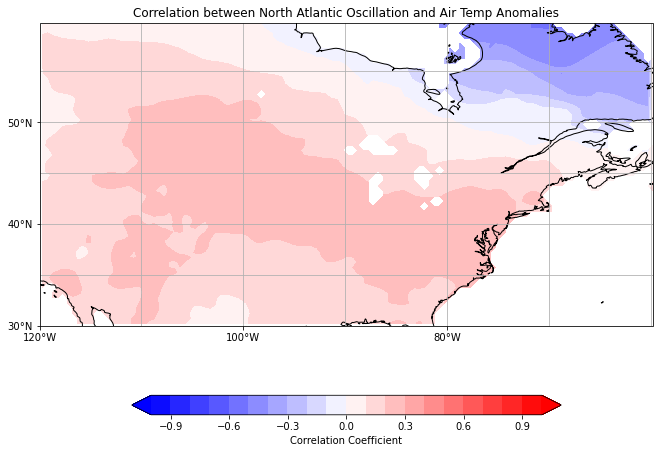

In [28]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=-90))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=ds_anom['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_anom['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-120,-60,20),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
# Define ytick for latitude
ax.set_yticks(np.arange(30,60,10),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between North Atlantic Oscillation and Air Temp Anomalies')

Interpreting our Correlation Red areas indicate that the air temperature goes up with the NAO and down when the NAO goes down.
Blue area indicate the oppposite: air temperature increases when the NAO decreases and decreases when the NAO increases. 
The values near zero indicate no relationship between air temperature anomalies and the NAO.
How do we determine how close to zero means there is no relationship vs. a relationship? Calculate statistical significance

Important Reminder You have probably heard the phrase "Correlation is NOT causation, but what does this mean?""

It means that just because two variables are highly correlated, does not mean that one variable causes the other one to vary in a certain way.

Attributing cause comes from our understanding of the physical climate system. We have a physical understanding of how the NAO impacts the atmospheric circulation and therefore air temperature. We use correlation as a way to quantify that relationship.

Always be suspicious of a correlation that makes no sense!

Statistical Significance of a Correlation The purpose statistical significance is to confirm we don't make conclusions about result obtained by random chance. We want to be sure that when we find a correlation, there is in fact a relationship and we didn't just get lucky.

### Let's calculate statistical significance of the correlation using the stats package and the function spearmanr. We used the spearmanr because our data had lots of nan's.

This function calculates both the correlation coefficient and the p-value indicating it the % chance that we could be wrong about it being different from zero. 
Input x(N,) array_like

nao index y(N,) array_like

Timeseries at a single point

### ds_index['nao'] 840 data points with lots of nans

In [29]:
ds_anom['air']

<xarray.DataArray 'air' (time: 840, lat: 60, lon: 120)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [ -9.379456  , -10.439148  , -10.615845  , ...,          nan,
                  nan,          nan],
        [ -8.2574005 ,  -9.205032  , -10.133408  , ...,          nan,
                  nan,          nan],
        [ -8.459015  ,  -8.657898  ,  -8.851501  , ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [  1.4862671 ,   0.97213745,   0.7889099 , ...,          nan,
                  nan,          nan],
        [  1.6047363 ,   1.3464355 ,   1.0712891 , ...,          nan,
                  nan,          nan],
        [  1.7119751 ,   1.5919495 ,   1.4299316 , ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  1.6877747 ,   1.2380981 ,   1.3870392 , ...,          nan,
                  nan,          nan],
        [  0.94696045,   0.86120605,   0.8454132 , ...,          nan,
                  nan,          nan],
        [  0.48184204,   0.45516968,   0.42440796, ...,          nan,
                  nan,          nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 30.25 30.75 31.25 31.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 240.25 240.75 241.25 241.75 ... 298.75 299.25 299.75
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [30]:
# import spearmanr
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [31]:
nx=len(ds_anom['lon'])
ny=len(ds_anom['lat'])
nz=len(ds_anom['time'])
print(' nx =  ',nx,'  ny = ',ny, '  nz = ',nz)

#  Need to predefine the arrays before we can populate them
#
#
p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))
for i in range(nx):
    for j in range(ny):
        r,p=spearmanr(ds_index['nao'],ds_anom['air'][:,j,i],nan_policy='propagate') 
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape

 nx =   120   ny =  60   nz =  840


(60, 120)

In [32]:
r_array.shape

(60, 120)

Text(0.5, 1.0, 'Correlations between North Atlantic Oscillation and Air Temp Anomalies')

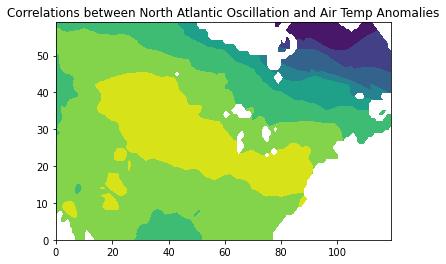

In [33]:
plt.contourf(r_array)
plt.title('Correlations between North Atlantic Oscillation and Air Temp Anomalies')

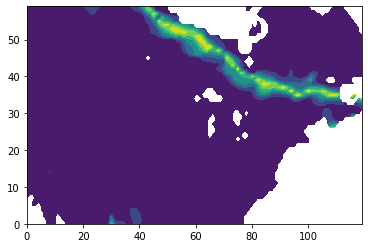

In [34]:
plt.contourf(p_array)
# plot of significance.

### Plot our correlation including Significance within 5%

In [35]:
mask_sig=np.where(p_array<0.05,r_array,np.nan)

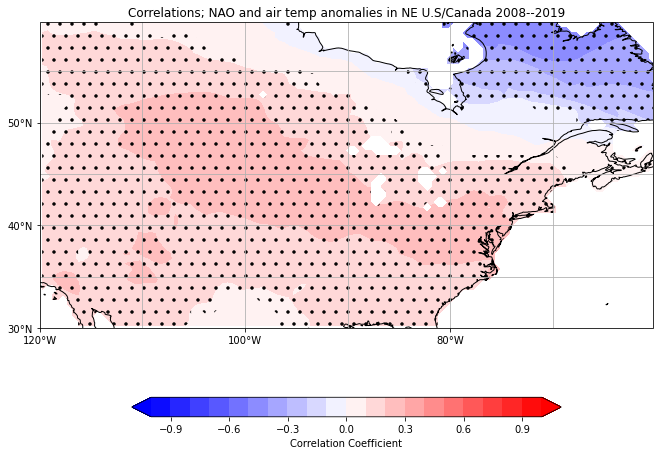

In [36]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_array
#data,lon=add_cyclic_point(data,coord=ds_anoms['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=ds_anoms['lon'])

# Make a filled contour plot
cs=ax.contourf(ds_anom['lon'],ds_anom['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(ds_anom['lon'],ds_anom['lat'],mask_sig,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-120,-60,20),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
# Define ytick for latitude
ax.set_yticks(np.arange(30,60,10),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlations; NAO and air temp anomalies in NE U.S/Canada 2008--2019')
plt.savefig('Correlations--NAO and air temp anomalies in NE U.S.-Canada-12-02-20', format='png', bbox_inches='tight')